#### Gradient Descent with Momentum

If you took the time to understand EMA from the previous notebook, this part should start making sense.

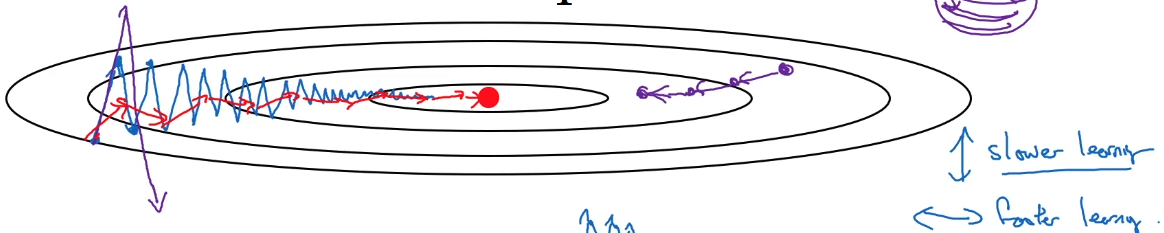

To descend the loss curve we have to -
- minimize going up and down
- incentivize going horizontally.

Adding momentum does exactly that. Everytime you are starting to get stuck at a local optima, it adds a portion of the previous gradient and gives an almighty push to break free, yipeeee.


Momentum pseudo

on every iteration for the mini batch,
- compute dW and db
- Vdw = β * dw + (1 - β) * dw
- Vdb = β * db + (1 - β) * db


Now the weight update is -
- W := W - learning_rate * Vdw
- b := b - learning_rate * Vdb


Consider rolling a bowl down a bowl , then

- *(1 - β) * dw* acts as the acceleration term to push forward.
- *β * dw* acts as a type of friction to make sure we kinda dont overshoot.

β usually takes on values like 0.9.


In [1]:
### SGD without momentum

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(2024)

# Hyperparameters
n_embd = 10
n_hidden = 64
n_classes = 10
batch_size = 64
learning_rate = 0.01
num_epochs = 10


# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='01-backprop-by-hand/data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='01-backprop-by-hand/data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

# Initialize weights as per your example
g = torch.Generator().manual_seed(2024)

model.fc1.weight.data = torch.randn((n_hidden, 28 * 28), generator=g) * 0.1
model.fc1.bias.data = torch.randn(n_hidden, generator=g) * 0.1

model.fc2.weight.data = torch.randn((n_classes, n_hidden), generator=g) * 0.1
model.fc2.bias.data = torch.randn(n_classes, generator=g) * 0.1

parameters = list(model.parameters())

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses_no_momentum = []
epoch_losses_no_momentum = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
        
        train_losses_no_momentum.append(loss.item())
    
    avg_loss = total_loss / len(train_loader)
    epoch_losses_no_momentum.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')
    print("-------------------------------")

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting 01-backprop-by-hand/data\MNIST\raw\train-images-idx3-ubyte.gz to 01-backprop-by-hand/data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting 01-backprop-by-hand/data\MNIST\raw\train-labels-idx1-ubyte.gz to 01-backprop-by-hand/data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting 01-backprop-by-hand/data\MNIST\raw\t10k-images-idx3-ubyte.gz to 01-backprop-by-hand/data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting 01-backprop-by-hand/data\MNIST\raw\t10k-labels-idx1-ubyte.gz to 01-backprop-by-hand/data\MNIST\raw

Epoch 1/10, Batch 0/938, Loss: 3.5113
Epoch 1/10, Batch 100/938, Loss: 1.1630
Epoch 1/10, Batch 200/938, Loss: 0.5984
Epoch 1/10, Batch 300/938, Loss: 0.5959
Epoch 1/10, Batch 400/938, Loss: 0.4181
Epoch 1/10, Batch 500/938, Loss: 0.4385
Epoch 1/10, Batch 600/938, Loss: 0.3661
Epoch 1/10, Batch 700/938, Loss: 0.4646
Epoch 1/10, Batch 800/938, Loss: 0.6094
Epoch 1/10, Batch 900/938, Loss: 0.3430
Epoch 1/10, Average Loss: 0.6603
-------------------------------
Epoch 2/10, Batch 0/938, Loss: 0.5224
Epoch 2/10, Batch 100/938, Loss: 0.2465
Epoch 2/10, Batch 200/938, Loss: 0.3531
Epoch 2/10, Batch 300/938, Loss: 0.3682
Epoch 2/10, Batch 400/938, Loss: 0.4318
Epoch 2/10, Batch 500/938, Loss: 0.3043
Epoch 2/10, Batch 600/938, Loss: 0.3296
Epoch 2/10, Batch 700/938, Loss: 0.1731
Epoch 2/10, Batch 800/938, Loss: 0.4083
Epoch 2/10, Batch 900/938, Loss: 0.2373
Epoch 2/10, Average Loss: 0.

In [14]:
### SGD without momentum

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(2024)

# Hyperparameters
n_embd = 10
n_hidden = 64
n_classes = 10
batch_size = 64
learning_rate = 0.01
num_epochs = 10


# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='01-backprop-by-hand/data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='01-backprop-by-hand/data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

# Initialize weights as per your example
g = torch.Generator().manual_seed(2024)

model.fc1.weight.data = torch.randn((n_hidden, 28 * 28), generator=g) * 0.1
model.fc1.bias.data = torch.randn(n_hidden, generator=g) * 0.1

model.fc2.weight.data = torch.randn((n_classes, n_hidden), generator=g) * 0.1
model.fc2.bias.data = torch.randn(n_classes, generator=g) * 0.1

parameters = list(model.parameters())

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

train_losses_momentum = []
epoch_losses_momentum = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
        
        train_losses_momentum.append(loss.item())
    
    avg_loss = total_loss / len(train_loader)
    epoch_losses_momentum.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')
    print("-------------------------------")


Epoch 1/10, Batch 0/938, Loss: 3.5113
Epoch 1/10, Batch 100/938, Loss: 0.4272
Epoch 1/10, Batch 200/938, Loss: 0.2784
Epoch 1/10, Batch 300/938, Loss: 0.2532
Epoch 1/10, Batch 400/938, Loss: 0.1218
Epoch 1/10, Batch 500/938, Loss: 0.2014
Epoch 1/10, Batch 600/938, Loss: 0.2599
Epoch 1/10, Batch 700/938, Loss: 0.3040
Epoch 1/10, Batch 800/938, Loss: 0.3876
Epoch 1/10, Batch 900/938, Loss: 0.1470
Epoch 1/10, Average Loss: 0.3216
-------------------------------
Epoch 2/10, Batch 0/938, Loss: 0.2682
Epoch 2/10, Batch 100/938, Loss: 0.1530
Epoch 2/10, Batch 200/938, Loss: 0.1455
Epoch 2/10, Batch 300/938, Loss: 0.1652
Epoch 2/10, Batch 400/938, Loss: 0.2160
Epoch 2/10, Batch 500/938, Loss: 0.1601
Epoch 2/10, Batch 600/938, Loss: 0.1069
Epoch 2/10, Batch 700/938, Loss: 0.0360
Epoch 2/10, Batch 800/938, Loss: 0.2226
Epoch 2/10, Batch 900/938, Loss: 0.1052
Epoch 2/10, Average Loss: 0.1543
-------------------------------
Epoch 3/10, Batch 0/938, Loss: 0.1248
Epoch 3/10, Batch 100/938, Loss: 0.2

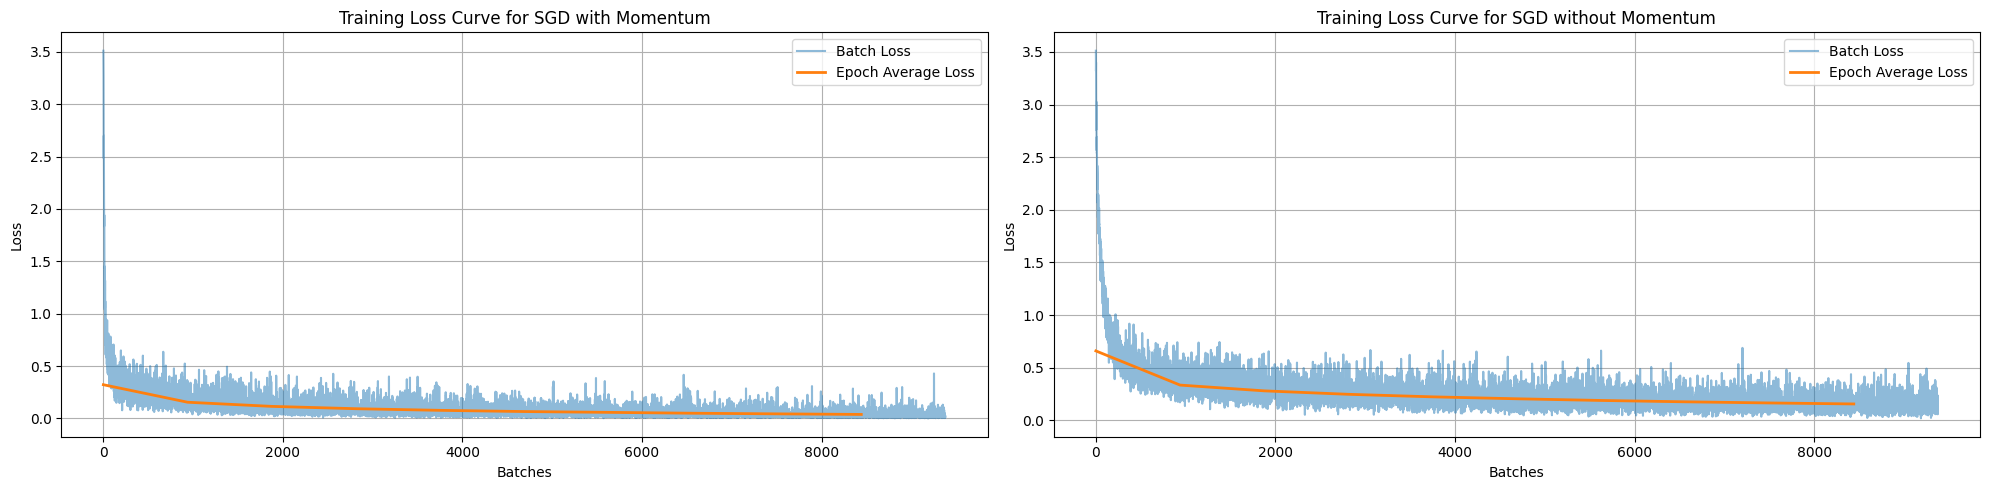

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Plot for SGD with momentum
plt.subplot(1, 2, 1)
plt.plot(train_losses_momentum, label='Batch Loss', alpha=0.5)
plt.plot(range(0, len(train_losses_momentum), len(train_loader)), epoch_losses_momentum, label='Epoch Average Loss', linewidth=2)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss Curve for SGD with Momentum')
plt.legend()
plt.grid(True)

# Plot for SGD without momentum
plt.subplot(1, 2, 2)
plt.plot(train_losses_no_momentum, label='Batch Loss', alpha=0.5)
plt.plot(range(0, len(train_losses_no_momentum), len(train_loader)), epoch_losses_no_momentum, label='Epoch Average Loss', linewidth=2)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss Curve for SGD without Momentum')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()